***************************************************************************************
proccesing output_eyes/photo19_Face_1_Left.jpeg
CIRCLES FOUND^^^\]


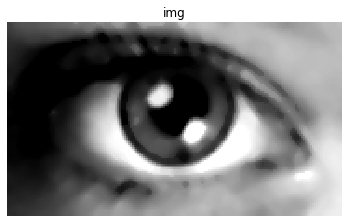

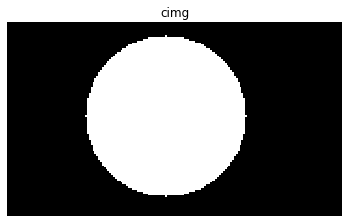

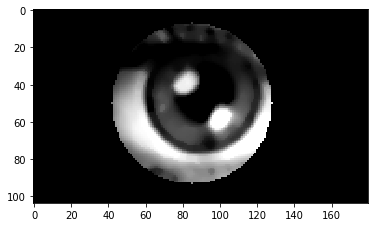

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import m3F
import os
from PIL import ImageFilter, ImageEnhance, Image
import PIL


inputImg = "output_eyes/photo19_Face_1_Left.jpeg"
print("***************************************************************************************")
if (type(inputImg) == str):
    img = cv2.imread(inputImg,0)
    imgColor = cv2.imread(inputImg)
    
    print("proccesing", inputImg)
    #print("input was string (filepath), image read from filepath")
else:
    #print("input was image", type(imgPath))
    img = inputImg
count = 0
if not isinstance(img, type(None)):
    

    img  = cv2.medianBlur(img,5)
    #
    #cimg=cv2.cvtColor(img,cv2.COLOR_GRAY2BGR )

    img = m3F.typeSwap(img)
    img = img.filter(ImageFilter.GaussianBlur(1.4))
    img = img.filter(ImageFilter.UnsharpMask(radius=2, percent=200, threshold=5))
    img = ImageEnhance.Contrast(img).enhance(1.4)
    #img = ImageEnhance.Sharpness(img).enhance(2.)
    img = m3F.typeSwap(img)
    img = cv2.medianBlur(img,5)
    
    cimg=img.copy()
    m3F.imshow(img,"img")



    #NoneType = type(None)

    #ret,thresh1 = cv2.threshold(greyImg,111,255,cv2.THRESH_BINARY)
    #thresh1 = cv2.medianBlur(thresh1,17)
    #cimg = cv2.cvtColor(thresh1,cv2.COLOR_GRAY2BGR)
    #plt.imshow(cimg)
    #plt.show()
    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1.5,120,param1=60,param2=15,minRadius=0,maxRadius=int(m3F.typeSwap(img).height/2))


    #print("type(circles) IS: ", type(circles))
    if not isinstance(circles, type(None)):
        #print("was not note None, was: ", type(circles))
        if (circles.size != 0):
            circles = np.uint16(np.around(circles))
            #print(circles)
            for i in circles[0,:]:
                # fill background with black
                cimg.fill(0)
                # draw the center of the circle filled with white
                cv2.circle(cimg,(i[0],i[1]),i[2],255,-1)
                #plt.show(cimg)
                m3F.imshow(cimg,"cimg")
                #can = cv2.Canny(img,30,60)
                #combined = np.hstack((cimg,can))
                
                mask = cv2.bitwise_and(img, cimg)

                finalImg = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                plt.imshow(finalImg)
                plt.show()
                #m3F.gHist(img)
                m3F.printGreen("CIRCLES FOUND^^^")

                
    else:
        can = cv2.Canny(img,50,30)
        combined = np.hstack((cimg,can))
        plt.imshow(combined)
        m3F.gHist(img)
        m3F.printRed("NO CIRCLES FOUND^^^")
else:
    m3F.printRed("NONE IMAGE")



#plt.imshow(cimg)
#plt.show()